# Naive Bayes

# Análise de Sentimentos

In [2]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler o arquivo de dados e conta a quantidade de linhas**

In [1]:
df = pd.read_csv('./datasets/Tweets_Mg.csv', encoding='utf-8')

NameError: name 'pd' is not defined

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
Unnamed: 0                   8199 non-null int64
Created At                   8199 non-null object
Text                         8199 non-null object
Geo Coordinates.latitude     104 non-null float64
Geo Coordinates.longitude    104 non-null float64
User Location                5489 non-null object
Username                     8199 non-null object
User Screen Name             8199 non-null object
Retweet Count                8199 non-null int64
Classificacao                8199 non-null object
Observação                   1 non-null object
Unnamed: 10                  0 non-null float64
Unnamed: 11                  0 non-null float64
Unnamed: 12                  0 non-null float64
Unnamed: 13                  0 non-null float64
Unnamed: 14                  0 non-null float64
Unnamed: 15                  0 non-null float64
Unnamed: 16                  0 non-null float64
Unnamed: 17 

In [7]:
# Expande o tamanho de exibição de coluna de texto
pd.set_option('display.max_colwidth', -1)
df.Text.head(100)

0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

**Excluindo linhas duplicados**

In [9]:
df.drop_duplicates('Text', inplace=True)

In [10]:
df.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

**Romovendo colunas desnecessárias**

In [18]:
for i in df.columns.values:
    if i.startswith('Unnamed'):
        df.drop(i, axis=1, inplace=True)
        print(f'Colunas deletadas{i}')

Colunas deletadasUnnamed: 0
Colunas deletadasUnnamed: 10
Colunas deletadasUnnamed: 11
Colunas deletadasUnnamed: 12
Colunas deletadasUnnamed: 13
Colunas deletadasUnnamed: 14
Colunas deletadasUnnamed: 15
Colunas deletadasUnnamed: 16
Colunas deletadasUnnamed: 17
Colunas deletadasUnnamed: 18
Colunas deletadasUnnamed: 19
Colunas deletadasUnnamed: 20
Colunas deletadasUnnamed: 21
Colunas deletadasUnnamed: 22
Colunas deletadasUnnamed: 23
Colunas deletadasUnnamed: 24


In [19]:
# Visualizando as colunas
df.count()

Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
dtype: int64

**Distribuição das classes neutros, positivos e negativos**

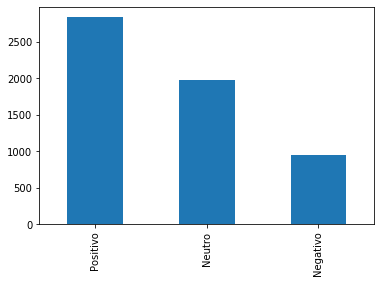

In [24]:
%matplotlib inline
df.Classificacao.value_counts().plot(kind='bar') # Distruibuição das classes

In [25]:
df.Classificacao

0       Neutro  
1       Neutro  
2       Neutro  
3       Neutro  
4       Negativo
          ...   
8194    Positivo
8195    Positivo
8196    Positivo
8197    Positivo
8198    Positivo
Name: Classificacao, Length: 5765, dtype: object

**Separado Tweet e suas Classes**

In [29]:
tweets = df['Text']
classes = df['Classificacao']

In [32]:
classes.head()

0    Neutro  
1    Neutro  
2    Neutro  
3    Neutro  
4    Negativo
Name: Classificacao, dtype: object

**Gerando o modelo**

In [48]:
# Transforma o texto em uma lista de vetores das frases
vectorizer = CountVectorizer(analyzer='word')
freq_tweets = vectorizer.fit_transform(tweets) # Treina o nosso vetor de palavras com os tweets

In [36]:
type(freq_tweets) # Matriz da relação de palavras em cada frases

scipy.sparse.csr.csr_matrix

In [37]:
freq_tweets.shape

(5765, 13029)

In [38]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Cria um modelo usando Naive Bayes Multinomial**

In [42]:
# Criando o modelo 
modelo = MultinomialNB() # Alpha - A interferência de valores neutros no algoritmo 
modelo.fit(freq_tweets,classes) # Passo como parâmetro os tweets e as previsões deste tweets

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Testando o modelo com algumas instâncias simples**

In [44]:
# Defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [50]:
# Transforma os dados de teste em vetores de palavras
freq_testes = vectorizer.transform(testes)

In [52]:
# Fazendo a classficação com o modelo treinado
# Não efetuar testes do modelos com teste arbitrário.
for t, c in zip(testes, modelo.predict(freq_testes)):
    print(f'{t} , {c}')

Esse governo está no início, vamos ver o que vai dar , Neutro
Estou muito feliz com o governo de Minas esse ano , Neutro
O estado de Minas Gerais decretou calamidade financeira!!! , Negativo
A segurança desse país está deixando a desejar , Neutro
O governador de Minas é mais uma vez do PT , Neutro


In [62]:
# Fazendo a classficação com o modelo treinado
# Não efetuar testes do modelos com teste arbitrário.
for t, c in zip(testes, modelo.predict(freq_testes)):
    print(f'{t} , {c}')

Esse governo está no início, vamos ver o que vai dar , Neutro
Estou muito feliz com o governo de Minas esse ano , Neutro
O estado de Minas Gerais decretou calamidade financeira!!! , Negativo
A segurança desse país está deixando a desejar , Neutro
O governador de Minas é mais uma vez do PT , Neutro


In [63]:
# Probabilidade de cada Classe
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

In [53]:
# Probabilidade de cada classe
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

## Avaliação do Modelo

* Usaremos a técnica de Cross Validation para avaliação dos modelos.
* Está técnica será usada com 10 folds

In [54]:
resultado = cross_val_predict(modelo, freq_tweets, classes, cv=10) # O modelo é treinado com 10 partes do dados.

In [56]:
# Matriz de confusão
pd.crosstab(classes, resultado, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,Negativo,Neutro,Positivo,All
Real,,,,
Negativo,846,100,5,951
Neutro,206,1656,112,1974
Positivo,53,294,2493,2840
All,1105,2050,2610,5765


**Métricas de validação do modelo**

In [60]:
sentimento = ['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classes, resultado, sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



## Tunning do Naive Bayes

In [64]:
from sklearn.model_selection import GridSearchCV

**Defina uma lista de valores de Alpha**

In [67]:
lista_alpha = list(range(1,11)) # Sensibilidade com valores neutros
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Cria um dicionario com o nome do parâmetro e a lista de valores**

In [69]:
parametros_grid = dict(alpha=lista_alpha)

**Instância do Método**

In [71]:
nv = MultinomialNB()

**Cria o objeto GridSearch**

In [72]:
grid = GridSearchCV(nv, parametros_grid, cv=10, scoring='accuracy')

**Roda o grid**

In [73]:
freq_tweets = vectorizer.fit_transform(tweets)
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

**Melhores Scores**

In [79]:
grid.cv_results_

{'mean_fit_time': array([0.00997336, 0.00987344, 0.01007304, 0.00992398, 0.00997329,
        0.00992401, 0.00992386, 0.0102725 , 0.01002376, 0.00997329]),
 'std_fit_time': array([3.70125167e-07, 2.99072475e-04, 2.99183612e-04, 5.67242333e-04,
        4.46168416e-04, 3.50013384e-04, 1.47796254e-04, 4.56955029e-04,
        4.71291095e-04, 4.46061792e-04]),
 'mean_score_time': array([0.00089755, 0.00089769, 0.00069809, 0.00039902, 0.00069818,
        0.00069828, 0.0006983 , 0.00049868, 0.00079801, 0.00049863]),
 'std_score_time': array([0.00029918, 0.00029923, 0.00045701, 0.00048869, 0.00045707,
        0.00045713, 0.00045715, 0.00049868, 0.00039901, 0.00049863]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha'

**Melhores Parâmetros**

In [80]:
grid.best_params_

{'alpha': 1}

In [81]:
grid.best_score_

0.8664353859496965

**Validando tunning do Algoritmo**

In [82]:
vectorizer = CountVectorizer(analyzer='word')
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB(alpha=5)
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=5, class_prior=None, fit_prior=True)

In [83]:
freq_teste = vectorizer.transform(testes)

In [85]:
# Fazendo a classificação com o modelo treinado
modelo.predict(freq_teste)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [90]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [91]:
sentimento = ['Positivo', 'Negativo', 'Neutro']
print(metrics.classification_report(classes, resultado))

              precision    recall  f1-score   support

    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974
    Positivo       0.96      0.88      0.91      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



**Considerações Finais**

* Considere aumentar a quantidade de dados de treino.

* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

* Considere alterar os parâmetros do algoritmo.

* Em tarefas de classificação de textos considere utilizar outras modelagens como Bigrams por exemplo.

* Em tarefas envolvendo textos outras técnicas como stemming ou remoção de stoptowords podem dar bons resultados.
